In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("insurance_dataset.csv")
df

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,male,46.67,2,no,northeast,High blood pressure,NaN,Frequently,Student,Basic,11584.134900
999996,33,male,36.83,2,no,northeast,NaN,High blood pressure,Frequently,Unemployed,Basic,9834.871456
999997,39,male,39.84,0,yes,northeast,Heart disease,High blood pressure,Rarely,Blue collar,Standard,22076.632856
999998,37,female,45.06,4,yes,northeast,High blood pressure,Diabetes,Occasionally,Unemployed,Premium,20297.618728


## Medical insurance charges
- **Age**: The age of the insured individual.
- **Gender**: The gender of the insured individual.
- **BMI** (Body Mass Index): A measure of body fat based on height and weight.
- **Children**: The number of children covered by the insurance plan.
- **Smoking Status**: Indicates whether the individual is a smoker.
- **Region**: The geographical region of the insured individual.
- **Medical History**: Information about the individual's old medical problems.
- **Family Medical History**: Information about the family's medical record.
- **Exercise Frequency**: The frequency of the individual's exercise routine.
- **Occupation**: The occupation of the insured individual.
- **Coverage Level**: The type of insurance plan.
- **Charges**: The health insurance charges for the individual

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         749238 non-null   object 
 7   family_medical_history  749596 non-null   object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


Gender Distribution

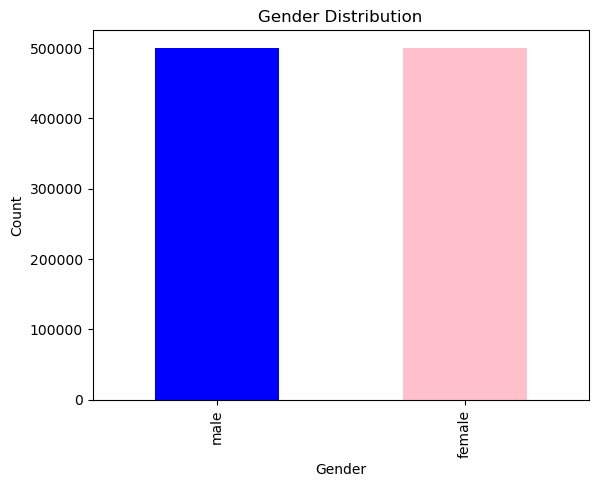

In [7]:
gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Charges by gender

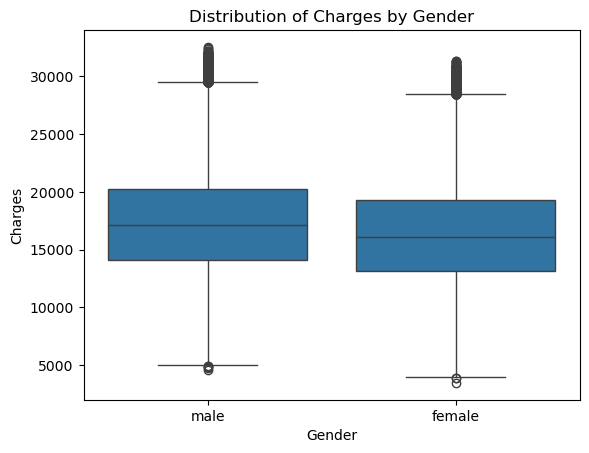

In [8]:
sns.boxplot(data=df, x='gender', y='charges')
plt.title('Distribution of Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

Average Charges by Gender and Smoking Status

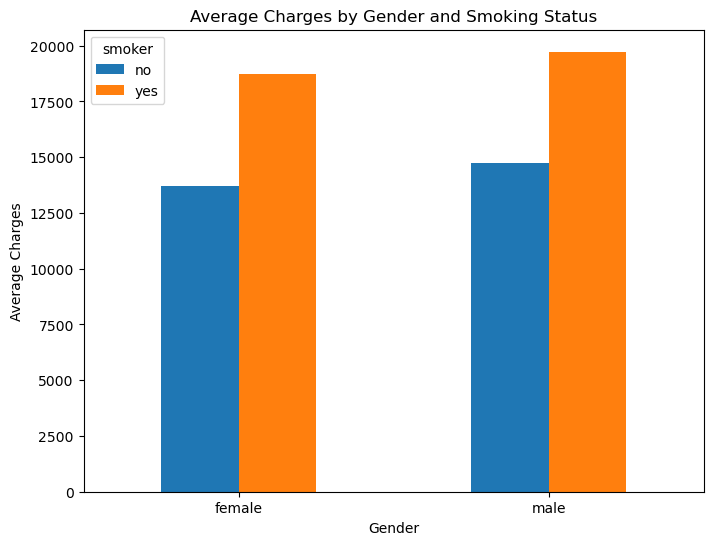

In [10]:
avg_charges = df.groupby(['gender', 'smoker'])['charges'].mean().unstack()
avg_charges.plot(kind='bar', figsize=(8, 6))
plt.title('Average Charges by Gender and Smoking Status')
plt.ylabel('Average Charges')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

Smokers have significantly higher charges compared to non-smokers, irrespective of gender.
Among smokers, the charges for males are slightly higher than for females.
For non-smokers, the charges are almost equal but samely males have slightly higher charges.


BMI Distribution by Gender and Smoker Status

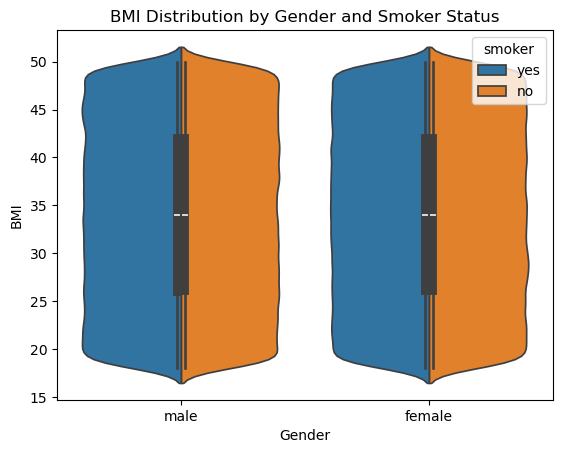

In [11]:
sns.violinplot(data=df, x='gender', y='bmi', hue='smoker', split=True)
plt.title('BMI Distribution by Gender and Smoker Status')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

For both genders, there doesn’t appear to be a significant difference in BMI distribution between smokers and non-smokers.

Correlation of Numeric Features by Gender

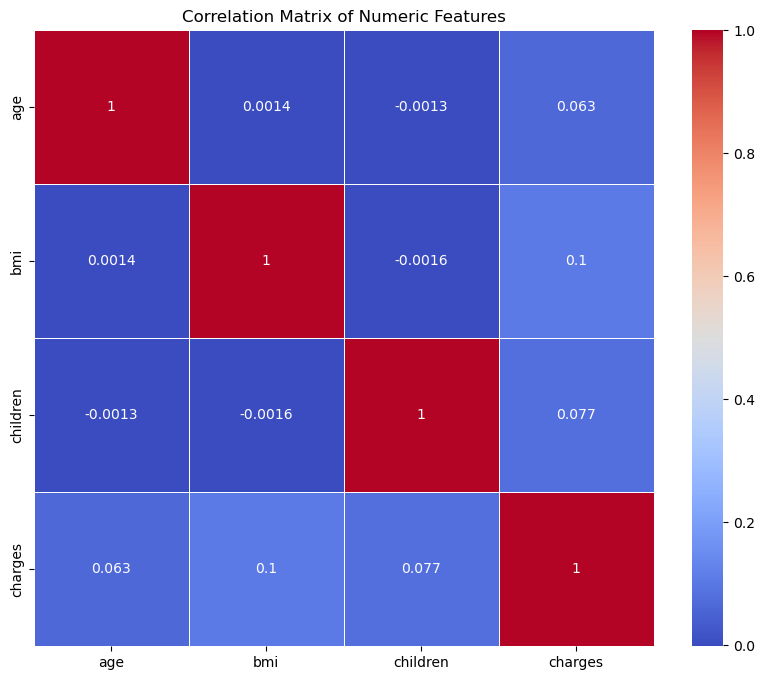

In [13]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

The correlation between charges and bmi is relatively weak but positive, meaning higher BMI slightly increases charges.
Other features, such as age and children, also show weak correlations with charges.
There’s little to no correlation between bmi, age, and children.

Smoker and Non-Smoker Comparisons

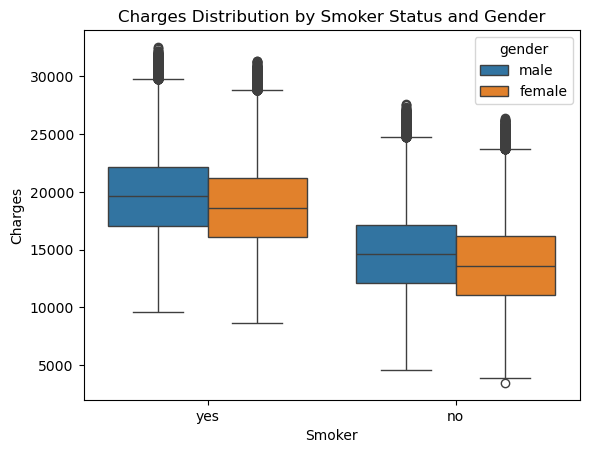

In [20]:
sns.boxplot(data=df, x='smoker', y='charges', hue='gender')
plt.title('Charges Distribution by Smoker Status and Gender')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

Distribution of Charges

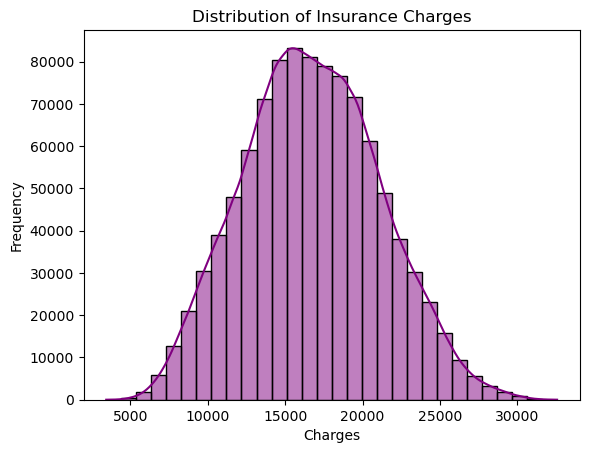

In [22]:
sns.histplot(df['charges'], kde=True, color='purple', bins=30)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

The distribution of charges is bell-shaped, indicating a near-normal distribution. Most charges fall between $10,000 and $20,000, with the peak (mode) around $15,000. There are fewer individuals with extremely low (<$5,000) or extremely high (> $30,000) charges.

Charges by Occupation

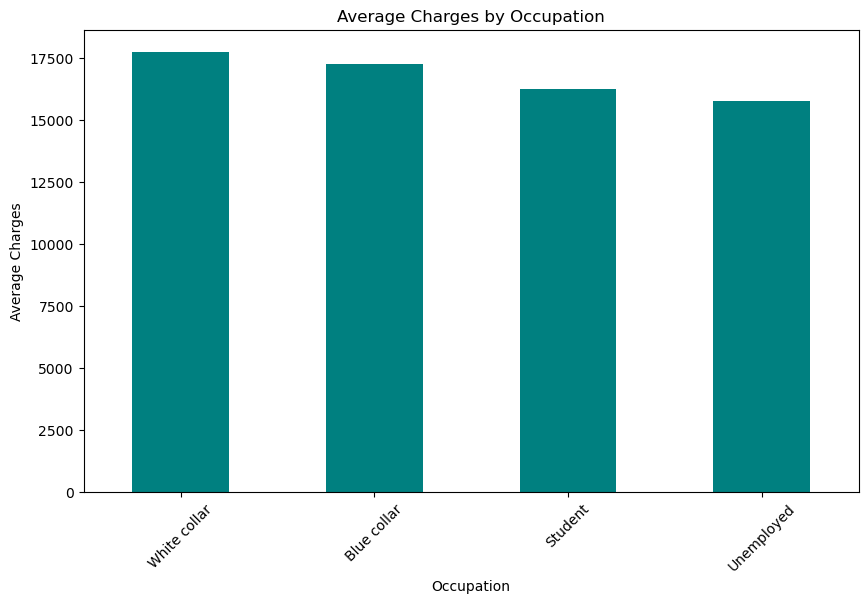

In [29]:
avg_charges_occupation = df.groupby('occupation')['charges'].mean().sort_values(ascending=False)
avg_charges_occupation.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Average Charges by Occupation')
plt.ylabel('Average Charges')
plt.xlabel('Occupation')
plt.xticks(rotation=45)
plt.show()

White-collar workers have the highest average insurance charges, followed closely by blue-collar workers.
Students and unemployed individuals have slightly lower average charges compared to employed groups.
White-collar and blue-collar workers might have higher incomes or risk profiles that lead to higher insurance costs.
Students and unemployed individuals may be younger on average, which can correlate with lower health risks and thus lower charges.

Charges by Coverage Level

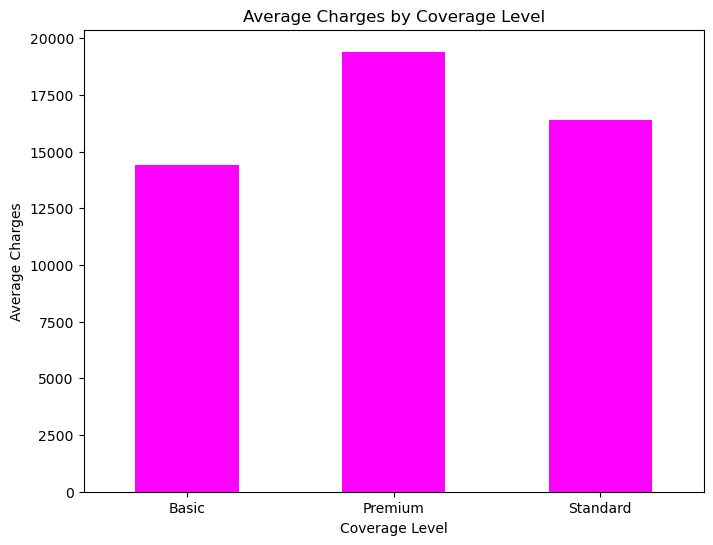

In [30]:
avg_charges_coverage = df.groupby('coverage_level')['charges'].mean()
avg_charges_coverage.plot(kind='bar', figsize=(8, 6), color='magenta')
plt.title('Average Charges by Coverage Level')
plt.ylabel('Average Charges')
plt.xlabel('Coverage Level')
plt.xticks(rotation=0)
plt.show()

Premium-level coverage likely includes more comprehensive benefits, leading to higher charges.
Basic coverage, while more affordable, might have limited benefits and lower associated risks.
The difference in charges reflects the level of protection and risk insurers take on for each coverage type.